# Concrete Compressive Strength Prediction Notebook

### Importing important Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

### Importing Dataset

In [56]:
df = pd.read_excel(r'E:\Machine Learning\ML Project\Concrete\Concrete_Data.xls')

In [57]:
df.head(100)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
95,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
96,425.0,106.3,0.0,151.4,18.6,936.0,803.7,7,46.801631
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.698469
98,475.0,118.8,0.0,181.1,8.9,852.1,781.5,7,55.599345


In [4]:
df.shape

(1030, 9)

In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Checking Null and Na values

In [6]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### Checking 0 in each cloumns

We are observing that "Blast Furnace Slag (component 2)(kg in a m^3 mixture)", "Fly Ash (component 3)(kg in a m^3 mixture)" and "Superplasticizer (component 5)(kg in a m^3 mixture)" having 0 value where "Fly Ash (component 3)(kg in a m^3 mixture)" having more than 50% of 0 values so we have decided to drop that column.

In [8]:
lst = ['Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)']

df[df == 0].count()


Cement (component 1)(kg in a m^3 mixture)                  0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    466
Fly Ash (component 3)(kg in a m^3 mixture)               566
Water  (component 4)(kg in a m^3 mixture)                  0
Superplasticizer (component 5)(kg in a m^3 mixture)      379
Coarse Aggregate  (component 6)(kg in a m^3 mixture)       0
Fine Aggregate (component 7)(kg in a m^3 mixture)          0
Age (day)                                                  0
Concrete compressive strength(MPa, megapascals)            0
dtype: int64

In [9]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Replacing 0 with NaN values

In [11]:
for i in lst : 
    df[i].replace(to_replace = 0,value = np.nan,inplace = True)

In [12]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                  0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    466
Fly Ash (component 3)(kg in a m^3 mixture)               566
Water  (component 4)(kg in a m^3 mixture)                  0
Superplasticizer (component 5)(kg in a m^3 mixture)      379
Coarse Aggregate  (component 6)(kg in a m^3 mixture)       0
Fine Aggregate (component 7)(kg in a m^3 mixture)          0
Age (day)                                                  0
Concrete compressive strength(MPa, megapascals)            0
dtype: int64

### Droping "Fly Ash (component 3)(kg in a m^3 mixture)" column

In [13]:
# FlyAsh is droped because it has more than 50%(566/1030) of null value that's why...
df = df.drop(labels='Fly Ash (component 3)(kg in a m^3 mixture)',axis=1)

In [14]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [15]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,NaN,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,NaN,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,228.0,NaN,932.0,594.0,270,40.269535
3,332.5,142.5,228.0,NaN,932.0,594.0,365,41.052780
4,198.6,132.4,192.0,NaN,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,NaN,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,32.768036


In [16]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [17]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                  0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    466
Water  (component 4)(kg in a m^3 mixture)                  0
Superplasticizer (component 5)(kg in a m^3 mixture)      379
Coarse Aggregate  (component 6)(kg in a m^3 mixture)       0
Fine Aggregate (component 7)(kg in a m^3 mixture)          0
Age (day)                                                  0
Concrete compressive strength(MPa, megapascals)            0
dtype: int64

### Renaming the columns

In [18]:
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Blast Furnance Slag',
    'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine Aggregate',
    'Concrete compressive strength(MPa, megapascals) ' : 'Concrete Comprenssive Strength',
    'Age (day)' : 'Age'
},inplace=True) 

### Observing spread of our datapoints.

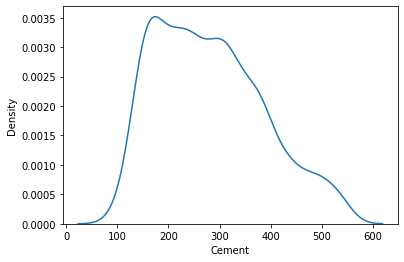

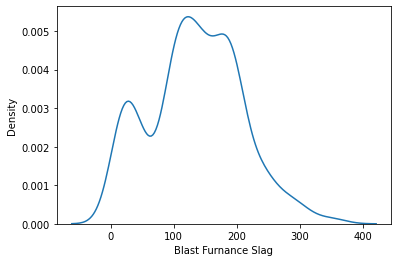

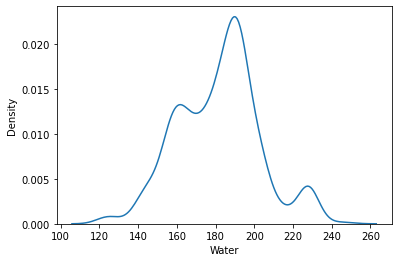

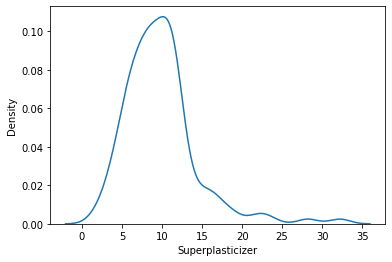

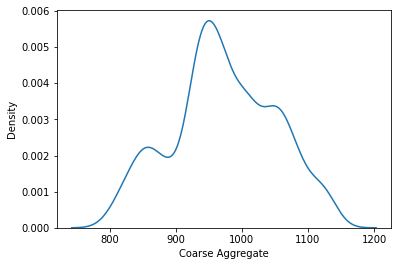

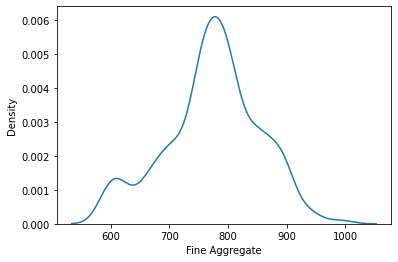

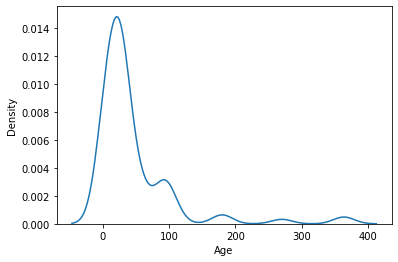

In [19]:
lst1 = ['Cement','Blast Furnance Slag','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']
for i in lst1 : 
    sns.kdeplot(x=df[i])
    plt.show()

### Checking Outliers using box plot

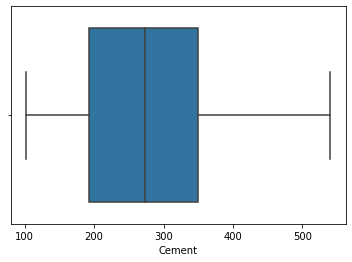

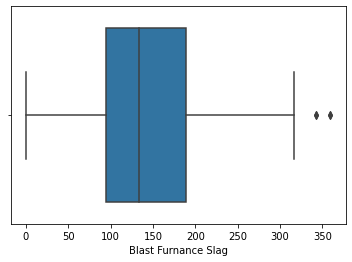

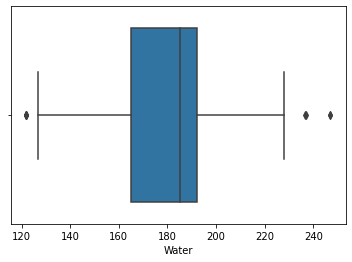

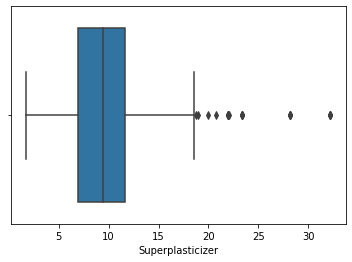

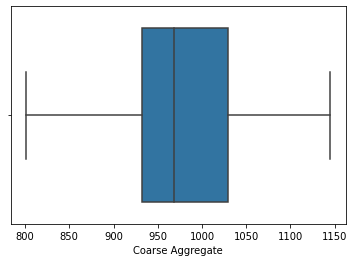

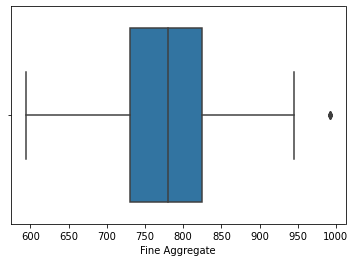

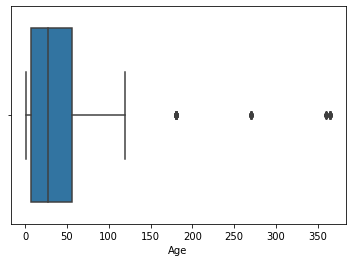

In [20]:
for i in lst1 : 
    sns.boxplot(x=df[i])
    plt.show()

### Checking correlation b/w features

If the features will highly co-related then we will drop them.

In [21]:
# No NULL correlation found b/w dependent and independent features.
df.corr()

,Cement,Blast Furnance Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Comprenssive Strength
Cement,1.000000,-0.322027,-0.081544,0.364391,-0.109356,-0.222720,0.081947,0.497833
Blast Furnance Slag,-0.322027,1.000000,0.240219,0.068883,-0.001439,-0.249112,-0.042181,-0.086141
Water,-0.081544,0.240219,1.000000,-0.538022,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.364391,0.068883,-0.538022,1.000000,-0.202861,0.207219,0.009231,0.284536
Coarse Aggregate,-0.109356,-0.001439,-0.182312,-0.202861,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.249112,-0.450635,0.207219,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.042181,0.277604,0.009231,-0.003016,-0.156094,1.000000,0.328877
Concrete Comprenssive Strength,0.497833,-0.086141,-0.289613,0.284536,-0.164928,-0.167249,0.328877,1.000000


In [22]:
'''As we know that Coarse Aggregate  (component 6)(kg in a m^3 mixture) and 
Blast Furnace Slag (component 2)(kg in a m^3 mixture) both the features having some amount of null values so if both the 
values are null then we will drop that row.'''

'''count = 0
for i in df['Blast Furnance Slag'] : 
    for j in df['Coarse Aggregate'] : 
        if i == 0 and j == 0 :
            count += 1
print('Count : ',count)'''      

In [23]:
df.describe()

,Cement,Blast Furnance Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Comprenssive Strength
count,1030.000000,564.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,134.950975,181.566359,9.814447,972.918592,773.578883,45.662136,35.817836
std,104.507142,73.153836,21.355567,4.581541,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.020000,121.750000,1.720000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,94.700000,164.900000,6.930000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,133.850000,185.000000,9.410000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,189.000000,192.000000,11.600000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [24]:
df1 = df.copy()

## Creating Model without handling outliers 

In [25]:
df.isna().sum()

Cement                              0
Blast Furnance Slag               466
Water                               0
Superplasticizer                  379
Coarse Aggregate                    0
Fine Aggregate                      0
Age                                 0
Concrete Comprenssive Strength      0
dtype: int64

### Replacing Nan value by mean of that particular column.

In [26]:
df['Blast Furnance Slag'] = df['Blast Furnance Slag'].fillna(np.mean(df['Blast Furnance Slag']))
df['Superplasticizer'] = df['Superplasticizer'].fillna(np.mean(df['Superplasticizer']))

In [27]:
df.isna().sum()

Cement                            0
Blast Furnance Slag               0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age                               0
Concrete Comprenssive Strength    0
dtype: int64

### Checking corelation using heat map

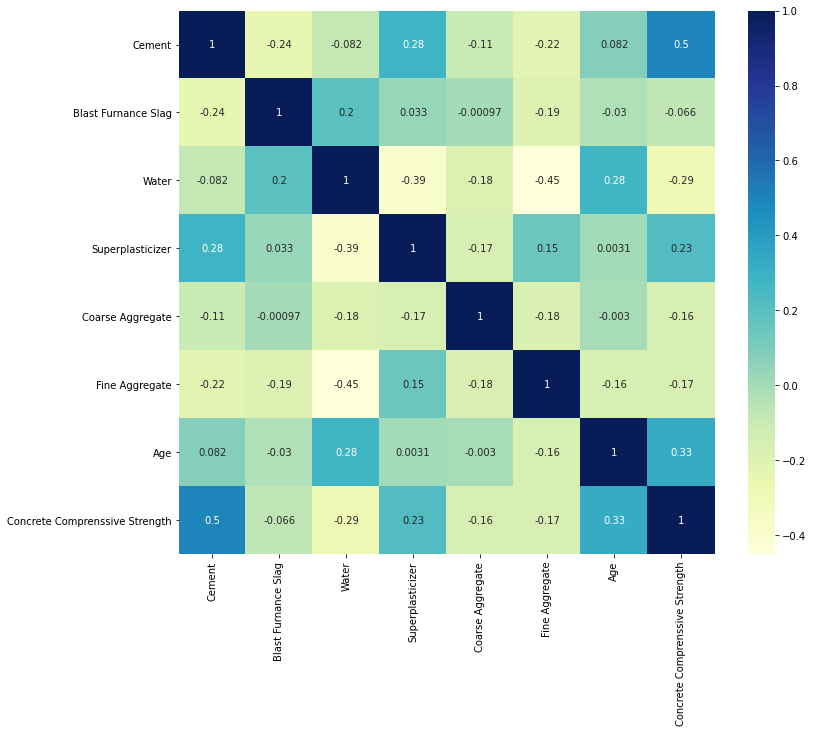

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

### Seperating Dependent and Independent Features

In [29]:
X = df.drop(labels='Concrete Comprenssive Strength',axis=1)
y = df['Concrete Comprenssive Strength']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Normalizing the dataset

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [33]:
lr = LinearRegression()
logreg = LogisticRegression()
svr = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
r = Ridge()
l = Lasso()
pr = PolynomialFeatures()

### Linear Regression

In [34]:
lr.fit(X_train_scaled,y_train)
score = lr.score(X_test_scaled,y_test)
print('Linear Regressor Score : ',score)
y_pred_lr = lr.predict(X_test_scaled)
print('----------------------------------')
print('Calculating the Error : ')
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print('Mean Squared Error : ',mse_lr)
print('Root Mean Squared Error : {}'.format(rmse_lr))

Linear Regressor Score :  0.6182864227239842
----------------------------------
Calculating the Error : 
Mean Squared Error :  100.53736102850793
Root Mean Squared Error : 10.026832053470724


###  Support Vector Regression

In [35]:
svr.fit(X_train_scaled,y_train)
score = svr.score(X_test_scaled,y_test)
print('SVR Score : ',score)
y_pred_svr = svr.predict(X_test_scaled)
print('----------------------------------')
print('Calculating the Error : ')
mse_svr = mean_squared_error(y_test,y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print('Mean Squared Error : ',mse_svr)
print('Root Mean Squared Error : {}'.format(rmse_svr))

SVR Score :  0.6420830141969852
----------------------------------
Calculating the Error : 
Mean Squared Error :  94.26971258581435
Root Mean Squared Error : 9.709259116215529


### Decision Tree Regressor

As we know that Tree and enssemble techniques doesn't require normalize data.

In [37]:
dt.fit(X_train,y_train)
score = dt.score(X_test,y_test)
print('Decision Tree Regressor Score : ',score)
y_pred_dt_nonscalled = dt.predict(X_test)
print('----------------------------------')
print('Calculating the Error : ')
mse_dt_nonscalled = mean_squared_error(y_test,y_pred_dt_nonscalled)
rmse_dt_nonscalled = np.sqrt(mse_dt_nonscalled)
print('Mean Squared Error : ',mse_dt_nonscalled)
print('Root Mean Squared Error : {}'.format(rmse_dt_nonscalled))

Decision Tree Regressor Score :  0.8371699165260877
----------------------------------
Calculating the Error : 
Mean Squared Error :  42.88688656385242
Root Mean Squared Error : 6.548808026187088


### Random Forest Regressor

In [39]:
print('Random Forest Regressor : ',end='\n')
rf.fit(X_train,y_train)
score = rf.score(X_test,y_test)
print('Random Forest Regressor Score : ',score)
y_pred_nonscalled = rf.predict(X_test)
print('----------------------------------')
print('Calculating the Error : ')
mse_rf_nonscalled = mean_squared_error(y_test,y_pred_nonscalled)
rmse_rf_nonscalled = np.sqrt(mse_rf_nonscalled)
print('Mean Squared Error : ',mse_rf_nonscalled)
print('Root Mean Squared Error : {}'.format(rmse_rf_nonscalled))

Random Forest Regressor without Normalization : 
Random Forest Regressor Score :  0.914103079125266
----------------------------------
Calculating the Error : 
Mean Squared Error :  22.62389985404097
Root Mean Squared Error : 4.7564587514285215


### Ridge Regressor

In [40]:
r.fit(X_train_scaled,y_train)
score = r.score(X_test_scaled,y_test)
print('Ridge Regressor Score : ',score)
y_pred_r = r.predict(X_test_scaled)
print('----------------------------------')
print('Calculating the Error : ')
mse_r = mean_squared_error(y_test,y_pred_r)
rmse_r = np.sqrt(mse_r)
print('Mean Squared Error : ',mse_r)
print('Root Mean Squared Error : {}'.format(rmse_r))

Ridge Regressor Score :  0.6185195223691403
----------------------------------
Calculating the Error : 
Mean Squared Error :  100.4759662430567
Root Mean Squared Error : 10.023770061361978


### Lasso Regression

In [41]:
l.fit(X_train_scaled,y_train)
score = l.score(X_test_scaled,y_test)
print('Lasso Regressor Score : ',score)
y_pred_l = l.predict(X_test_scaled)
print('----------------------------------')
print('Calculating the Error : ')
mse_l = mean_squared_error(y_test,y_pred_l)
rmse_l = np.sqrt(mse_l)
print('Mean Squared Error : ',mse_l)
print('Root Mean Squared Error : {}'.format(rmse_l))

Lasso Regressor Score :  0.5912403047827486
----------------------------------
Calculating the Error : 
Mean Squared Error :  107.66088370559469
Root Mean Squared Error : 10.37597627722783


##### By using different Regression algorithm's we have observed that "Random Forest Regression Algo." gives us higher accuracy and minimum error so we will use it for our analysis.

### Hyperparameter tunning 

As we observed that Random Forest Regressor model giving us higher accuracy, so now we will tune the parameters which can 
also increase the accuracy of the model.

In [42]:
# Now we see that random forest is giving highest accuracy so now tune the parameters and select the useful features(feature selection)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 90, num = 9)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune that we have already created above.
rf1 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

###### Calculating the accuracy using tunned parameters and calculating the MSE and RMSE.

In [47]:
rf_ns = RandomForestRegressor(n_estimators = 555,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 20,
 bootstrap = True)

rf_ns.fit(X_train,y_train)
score_ns = rf_ns.score(X_test,y_test)
print('Random Forest Regressor Score : ',score_ns)
y_pred_ns = rf_ns.predict(X_test)
print('----------------------------------')
print('Calculating the Error : ')
mse_ns = mean_squared_error(y_test,y_pred_ns)
rmse_ns = np.sqrt(mse_ns)
print('Mean Squared Error : ',mse_ns)
print('Root Mean Squared Error : {}'.format(rmse_ns))

Random Forest Regressor Score :  0.9171523224627391
----------------------------------
Calculating the Error : 
Mean Squared Error :  21.820777050626422
Root Mean Squared Error : 4.671271459744811


### Comparing the Accuracy before and after hyperparameter tunning.

##### Accuracy after parameters tunning

##### Accuracy before parameters tunning

###### From both the observation's we can conclude that accuracy increses after parameter tunning as well as the MSE and RMSE also decreases.

## Now it's time to save the model using Pickle

In [4]:
model = open('CCS.pkl','rb')
forest = pickle.load(model)

In [52]:
y_pred1 = forest.predict([[375.0,93.800000,126.6,23.400000,852.1,992.6,7]])
print('Original value 45.698469')
print('Prediction value : {}'.format(y_pred1))

Original value 45.698469
Prediction value : [45.95270198]


### Predicting CCS using function

In [7]:
cement = float(input('Enter Quantity of Cement(in kg in a m^3 mixture) : '))
bfs = float(input('Enter Quantity of Blast Furnace Slag(in kg in a m^3 mixture) : '))
water = float(input('Enter Quantity of Water(in kg in a m^3 mixture) : '))
superplasticizer = float(input('Enter Quantity of Suerplasticizer(in kg in a m^3 mixture) : '))
caggrigate = float(input('Enter Quantity of Coarse Aggregate(in kg in a m^3 mixture) : '))
faggrigate = float(input('Enter Quantity of Fine Aggregate(in kg in a m^3 mixture) : '))
age = float(input('Enter Age(in days) : '))
data = np.array([[cement, bfs, water, superplasticizer, caggrigate, faggrigate, age]])
val = ccs(data)
print('The predicted Concrete compressive strength is : ',val,' MPa(megapascals).')

Enter Quantity of Cement(in kg in a m^3 mixture) : 260.9
Enter Quantity of Blast Furnace Slag(in kg in a m^3 mixture) : 100.5
Enter Quantity of Water(in kg in a m^3 mixture) : 200.6
Enter Quantity of Suerplasticizer(in kg in a m^3 mixture) : 8.6
Enter Quantity of Coarse Aggregate(in kg in a m^3 mixture) : 864.5
Enter Quantity of Fine Aggregate(in kg in a m^3 mixture) : 761.5
Enter Age(in days) : 28
The predicted Concrete compressive strength is :  33.27287316019141  MPa(megapascals).


### Function to predict CCS

In [5]:
def ccs(data) : 
    y_pred1 = forest.predict(data)
    return y_pred1[0]

##### To be continue in next notebook...